In [1]:
import pandas as pd
import numpy as np
import factor_analysis as fa
import alphalens
%matplotlib inline

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\empyrical\utils.py:32: UserWarning: Unable to import pandas_datareader. Suppressing import error and continuing. All data reading functionality will raise errors; but has been deprecated and will be removed in a later version.
  warnings.warn(msg)


In [21]:
# factor = pd.read_excel('../data/factor_monthly.xlsx', index_col=0)
factor = pd.read_excel('../data/factor.xlsx', index_col=0)

In [22]:
factor.index.set_names(['date'], inplace=True)
factor = factor.stack()
factor.index.set_names(['date', 'asset'], inplace=True)

In [23]:
factor

date        asset    
2009-12-31  000016.SZ      3.9358
            000404.SZ     17.8215
            000521.SZ     25.2613
            000541.SZ      8.0648
            000651.SZ     33.6597
                           ...   
2020-09-30  600651.SH    107.6888
            600690.SH     12.8154
            600839.SH     -1.0119
            600854.SH      2.6594
            600983.SH     -3.0961
Length: 990, dtype: float64

In [24]:
# prices = pd.read_excel('../data/prices_monthly.xlsx', index_col=0)
prices = pd.read_excel('../data/prices.xlsx', index_col=0)

In [25]:
factor_data = fa.utils.get_clean_factor_and_forward_returns(factor, prices, periods=(1,2,3))

Dropped 6.5% entries from factor data: 6.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [26]:
answer = alphalens.utils.get_clean_factor_and_forward_returns(factor, prices, periods=(1,2,3))

Dropped 6.5% entries from factor data: 6.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [27]:
np.array_equal(factor_data.values, answer.values)

True

In [28]:
mean_return_by_q_daily, std_err = alphalens.performance.mean_return_by_quantile(answer, by_date=False)

In [29]:
mean_return, std_err = fa.performance.mean_return_by_quantile(factor_data, by_date=False)

In [30]:
np.array_equal(mean_return.values, mean_return_by_q_daily.values)

True

In [31]:
mean_return_by_q_daily, std_err = alphalens.performance.mean_return_by_quantile(answer, by_date=True)

In [32]:
mean_return_daily, std_err = fa.performance.mean_return_by_quantile(factor_data, by_date=True)

In [33]:
np.array_equal(mean_return_daily.values, mean_return_by_q_daily.values)

True

In [35]:
mean_return

,1Q,2Q,3Q
factor_quantile,,,
1,-0.004921,0.000225,-0.005967
2,-0.010449,-0.032519,-0.015282
3,-0.019352,-0.026539,-0.048648
4,0.021279,0.032890,0.031296
5,0.014787,0.024388,0.038669


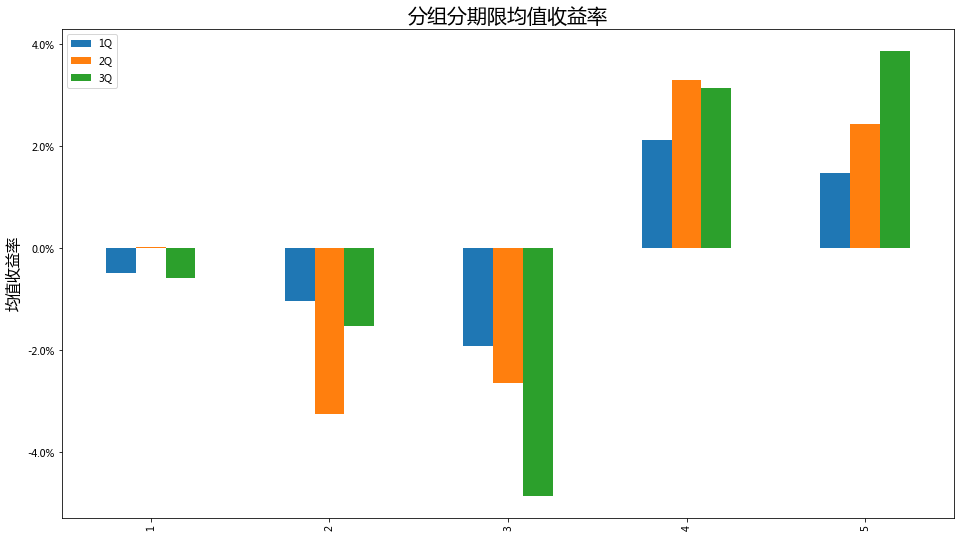

In [34]:
fa.plotting.plot_quantile_returns_bar(mean_return)

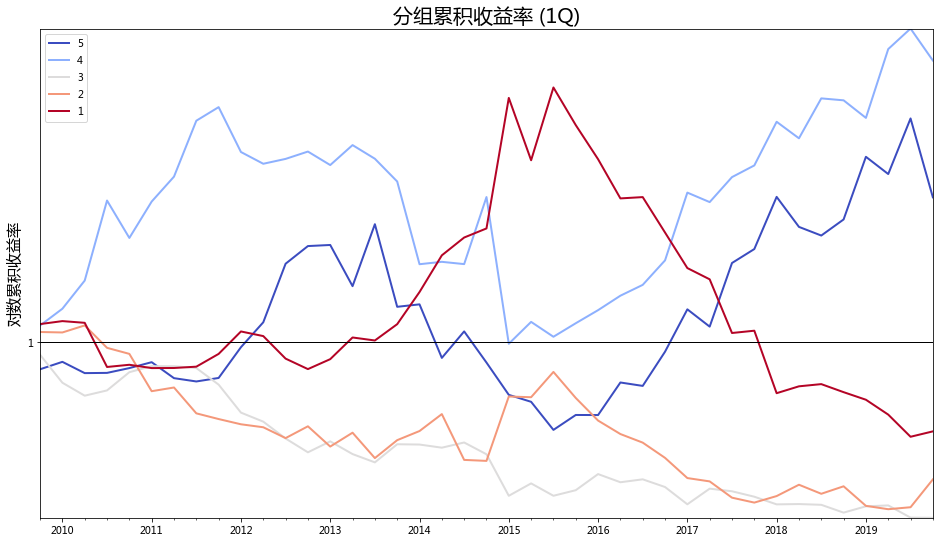

In [36]:
fa.plotting.plot_cumulative_returns_by_quantile(mean_return_daily, period='1Q')

In [37]:
ls_factor_returns = alphalens.performance.factor_returns(answer)

In [38]:
factor_returns = fa.performance.factor_returns(factor_data)

In [39]:
np.array_equal(ls_factor_returns.values, factor_returns.values)

True

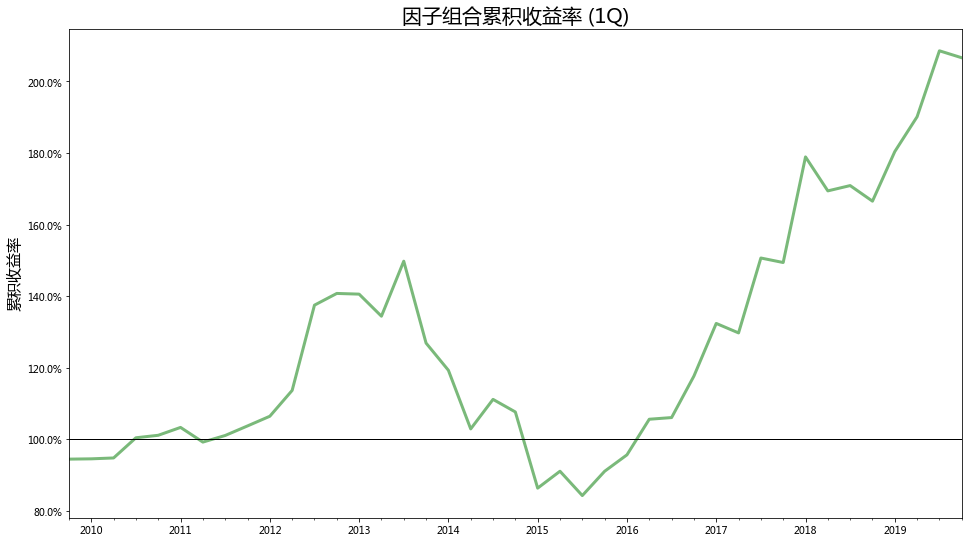

In [40]:
fa.plotting.plot_cumulative_returns(factor_returns, period='1Q')